# Gradient Descent in pratice

<img src="resources/gradient_descent.gif"  />

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Given data
X = 2.5 * np.random.rand(100) + 1.5   
res = 0.2 * np.random.randn(100)
Y = 0.3 * X + res

# Q1: Implement Gradient descent and plot resulting regression line and data points

#### 1. implement mse loss function, compare your results with sklearns mse function
$MSE_{matrix} = \frac{1}{2N} \lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} $


#### HINT: 
---
$\lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} = (\mathbf{X}w - \mathbf{y})^{T}(\mathbf{X}w - \mathbf{y})$ 
#### 2. implement gradient descent algorithm
#### Algorithm pseudo-code
---
```python
initialize w(0) = 100
for step in range(training steps):
    w(t+1) = w(t) - alpha * grad( J( w(t) ) ) 
    mse = mse(w(t+1))
    print(mse)
```
#### Hints: 
---
- Start with a w value of 100
- grad( J( w(t) ) ) = ($\nabla_{w_{1}} MSE$)

$\nabla_{w_{1}} MSE = w_{1}\mathbf{X^{T}X} - \mathbf{X^{T}y}$
##### 3. run gradient descent for 100 training iterations with a learning rate alpha = [0.05, 0.01, 0.005] and plot the mse-error(y-axis) over the number of training iterations(x-axis) for each alpha

In [56]:
def mse(X, w1, Y_true):
    return np.dot((X*w1 - Y_true).T, (X*w1 - Y_true)) / len(X)

In [57]:
mse(X,0.5,Y)

0.37049867389264335

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(Y, X*0.5)

0.37049867389264335

In [60]:
def gradient_descent(X, Y, training_itrs, alpha):
    
    w = 100
    error = []
    
    for i in range(training_itrs):
        
        delta_J = (1/(len(X) * 2)) * w * np.dot(X.T, X) - np.dot(X.T, Y)
        
        w = w - alpha * delta_J
        
        error.append(mse(X, w, Y))
    
    plt.plot(error)
    
    return w

64.7755259436589

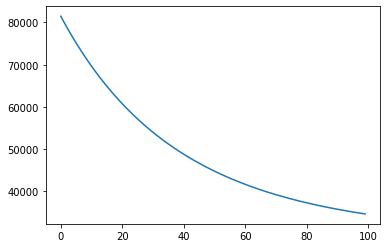

In [68]:
gradient_descent(X, Y, 100, 0.005)

# Q2. Use sklearn to compare multiple different linear regression algorithms
## Data Science use case : Real estate analysis

## TODO:
---
##### 1. Split data into training and test set
- shuffle the data
- 80 % training set, 20 % test set
- use numpy
- at the end you should have: x_train, y_train, x_test, y_test
##### 2. Separate labels(house price) from rest of the data
##### 3. Fill in missing values and drop categorical ones
##### 4. Train model using the following regression methods from sklearn:
- Linear Regression
- Ridge Regression
- ElasticNet
Documentation: https://scikit-learn.org/stable/modules/linear_model.html

##### 5. Compute MSE and residual error on test set for each method
##### 6. Compute the average house price
##### 7. Compute the max. house prize
##### 8. Compute the min. house prize
##### 9. Compute histogram of house prices
##### 10. Compute percentage of house prices higher than 1 mio. and plot histogram of those above 1 mio.
##### 11. Which object offers the most rooms ? Whats the prize ?
##### 12. How much do you, on average, pay for a room ? 

### Just FYI:
---
Formula for multidimensional linear regression:


Loss = $\frac{1}{N} \lvert\lvert \mathbf{X}\mathbf{w}-\mathbf{y} \lvert\lvert^{2}$

$\mathbf{X}\epsilon\mathbb{R^{Nxd}}$,
$\mathbf{w}\epsilon\mathbb{R^{dx1}}$,
$\mathbf{y}\epsilon\mathbb{R^{Nx1}}$

In [140]:
data = pd.read_csv('data/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [142]:
# using pandas
x_train, y_train, x_test, y_test = train_test_split(data.iloc[:,:5], data.iloc[:,5], test_size=0.2, shuffle=True)

In [143]:
# numpy
indices = np.random.permutation(data.shape[0])
train_indices = indices[:int(len(data)*0.8)] 
test_indices = indices[int(len(data)*0.8):]

x_train, y_train, x_test, y_test = data.iloc[train_indices,:5], data.iloc[train_indices,5], data.iloc[test_indices,:5], data.iloc[test_indices,5]

In [144]:
model = LinearRegression()
model = model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print(f'Train residuals: {np.sum(y_train - train_predictions)}')
print(f'Test residuals: {np.sum(y_test - test_predictions)}')

print(f'Train MSE: {mean_squared_error(y_train, train_predictions)}')
print(f'Test MSE: {mean_squared_error(y_test, test_predictions)}')

Train residuals: 1.1082738637924194e-06
Test residuals: -1473707.961686373
Train MSE: 10301344708.082394
Test MSE: 9906907169.206278


In [113]:
# solution 6, 7, 8
max_prize = data['Price'].max()
min_prize = data['Price'].min()
avg_prize = data['Price'].mean()

print(max_prize)
print(min_prize)
print(avg_prize)

2469065.5941747027
15938.657923287848
1232072.654142357


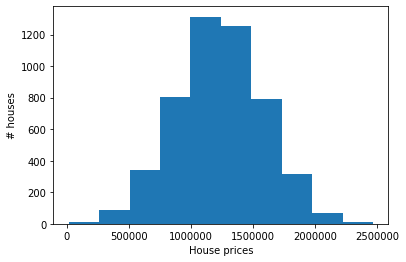

In [114]:
# solution 9
plt.hist(data['Price'])
plt.xlabel('House prices')
plt.ylabel('# houses')
plt.show()

Percentage of houses that cost more than 1mio.: 74.74%


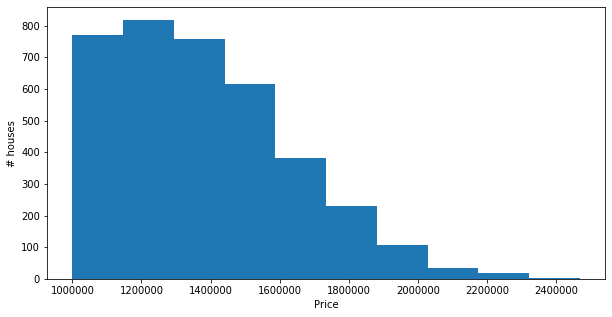

In [115]:
# solution 10
above_1mio = data[data['Price'] > 1000000]['Price']

per_above_1mio = len(above_1mio) / data.shape[0]

print(f'Percentage of houses that cost more than 1mio.: {100*per_above_1mio}%')

plt.figure(figsize=(10,5))
plt.hist(above_1mio)
plt.xlabel('Price')
plt.ylabel('# houses')
plt.show()

# Q4: Non-linear regression

### Apply linear regression methods on provided dataset

In [171]:
X = 2.5 * np.random.rand(100) + 1.5   
res = 0.2 * np.random.randn(100)
Y = 0.3 * X**10 + res

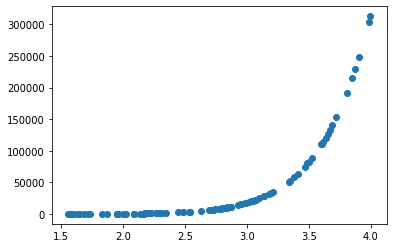

In [172]:
plt.scatter(X,Y)

### Non-linear regression algorithms

Luckily there exist some non-linear regression algorithms that we can use instead:

#### Support Vector Regression:: 
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

#### TODO:
----

1. Use noted algorithm to fit the data, play arround with different kernels and other hyperparameters(like shown in the link above)

2. Plot the regression line together with the data

In [173]:
X = X.reshape(-1,1)

In [174]:
from sklearn.svm import SVR

In [180]:
model = SVR(kernel='poly', C=100, gamma='auto', degree=4, epsilon=.1, coef0=1)
model = model.fit(X,Y)

predictions = model.predict(X)

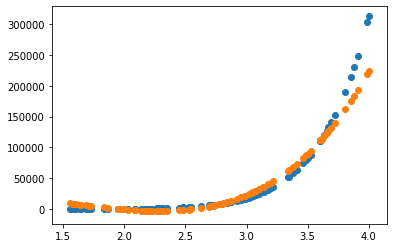

In [181]:
plt.scatter(X, Y)
plt.scatter(X, predictions)

# Q5: Apply learned methods on 1 dataset of your choice(optional)
Datasets and kernels can be found here: https://www.kaggle.com/